# Module 15 - Electrostatic Potential and Electric Fields

\begin{eqnarray}
\nabla \cdot \vec{E} &= \frac{\rho}{\varepsilon_0} \quad&\quad \nabla \times \vec{E} &= -\frac{\partial\vec{B}}{\partial t} \newline
\nabla \cdot \vec{B} &= 0 \quad&\quad \nabla \times \vec{B} &= \mu_0 \left(\vec{J} +\varepsilon_0 \frac{\partial\vec{E}}{\partial t}\right)
\end{eqnarray}

## Goals

- Elliptical differential equations (Poisson/Laplace)
- Spatial discretization and the Laplace equation

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'

## Electric Field, Potential, Poisson and Laplace's Equations

The electric field, $\vec{E}$, is a vector quantity that can be obtained from the scalar electrostatic potential, $V$, via

\begin{equation}
\vec{E} = -\nabla V.
\end{equation}

We can thus write Maxwell's first law (also known as Gauss' law) in terms of the electric field or the scalar potential

\begin{equation}
\nabla \cdot \vec{E} = \nabla^2 V = \frac{\rho}{\varepsilon_0}.
\end{equation}

In cartesian coordinates this has the form of an *elliptic* partial differential equation (PDE):

\begin{equation}
\frac{\partial^2}{\partial x^2} V(x,y,z) + \frac{\partial^2}{\partial y^2} V(x,y,z) + \frac{\partial^2}{\partial z^2} V(x,y,z) = \frac{\rho(x,y,z)}{\varepsilon_0}.
\end{equation}

This type of PDE is known as a Poisson equation. In the limit of zero charge density, $\frac{\rho(x,y,z)}{\epsilon_0}$, the equation reduces to Laplace's equation.

To solve this equation, we recurr to the method of finite differences as we have previously done when solving differential equations. Since we have a second order PDE, we use the centered difference approach and start with the Taylor expansions of the potential around a position $x \pm \Delta x$

\begin{align}
    V(x + \Delta x,y,z) &\approx V(x,y,z) + \frac{\partial V(x,y,z)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 V(x,y,z)}{\partial x^2} (\Delta x)^2 \\
    V(x - \Delta x,y,z) &\approx V(x,y,z) - \frac{\partial V(x,y,z)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 V(x,y,z)}{\partial x^2} (\Delta x)^2
\end{align}

and combine them

\begin{align}
    V(x + \Delta x,y,z) + V(x - \Delta x,y,z) &= 2 V(x,y,z) + \frac{\partial^2 V(x,y,z)}{\partial x^2} (\Delta x)^2
\end{align}

to obtain an epxression for the second derivative of the potential along any of the three cartesian dimensions

\begin{equation}
    \frac{\partial^2 V(x,y,z)}{\partial x^2} = \frac{V(x + \Delta x,y,z) + V(x - \Delta x,y,z) - 2V(x,y,z)}{(\Delta x)^2}
\end{equation}

or in discrete form ($x = i\Delta x$)

\begin{equation}
    \frac{\partial^2 V(i,j,k))}{\partial x^2} = \frac{V(i+1,j,k) + V(i-1,j,k) - 2V(i,j,k)}{(\Delta x)^2}.
\end{equation}
 
Plugging the second order centered difference expression for each cartesian dimension into Poisson's equation we get

\begin{align}
\frac{\partial^2}{\partial x^2} V(x,y,z) + \frac{\partial^2}{\partial y^2} V(x,y,z) + \frac{\partial^2}{\partial z^2} V(x,y,z) &\approx  \frac{1}{(\Delta x)^2}\left[V(i+1,j,k)+V(i-1,j,k) - 2V(i,j,k)\right] \newline
&+ \; \frac{1}{(\Delta y)^2}\left[V(i,j+1,k)+V(i,j-1,k) - 2V(i,j,k)\right] \newline
&+ \; \frac{1}{(\Delta z)^2}\left[V(i,j,k+1)+V(i,j,k-1) - 2V(i,j,k)\right] \newline
&= \frac{\rho(x,y,z)}{\varepsilon_0}.
\end{align}

We can rearrange various terms to find a relation for the potential at any point in the grid as a function of its neighbors (assuming a cubic grid for simplicity, $\Delta x = \Delta y = \Delta z = \Delta$)

\begin{equation}
V(i,j,k) = \frac{1}{6} \left[V(i+1,j,k) + V(i-1,j,k) + V(i,j+1,k) + V(i,j-1,k) + V(i,j,k+1) + V(i,j,k-1) \right] + \frac{\rho(i,j,k)\Delta^2}{6\varepsilon_0}.
\end{equation}

In two-dimensions the equation simplifies to

\begin{equation}
V(i,j) = \frac{1}{4} \left[V(i+1,j) + V(i-1,j) + V(i,j+1) + V(i,j-1) \right] + \frac{\rho(i,j)\Delta^2}{4\varepsilon_0}.
\end{equation}

### Question: can we use the above relation to find $V(x,y,z)$ given a set of boundary conditions (e.g., the value of the potential in certain regions)?

<div class="span alert alert-success">
<h2> Programming challenge </h2>

Use the finite difference equation to solve Laplace's equation (zero charge density) inside an ideal parallel plate capacitor in 2-dimensions (a system with fixed boundary conditions at the edges in the $x$ direction and periodic in $y$). For simplicity, the two plates are located at 0 and $L$ and the boundaries are set to $V(0,y) = -1$, $V(L,y) = 1$, $V(x,0)=V(x,L)$. Use a grid of 20 by 20 with $L=1$. Hint: start with the potential being zero everywhere except for the location of the two plates.
</div>

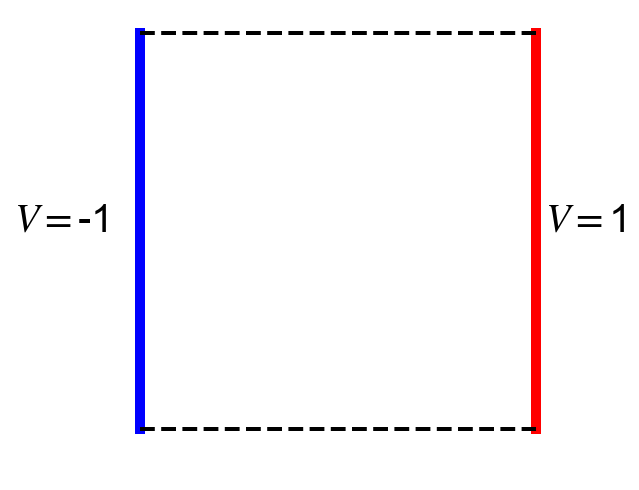

In [2]:
plt.figure()
plt.axis('off')
plt.plot((-1,-1),(-1,1),'b', lw=5)
plt.plot((1,1),(-1,1),'r', lw=5)
plt.plot((-1,1),(1,1),'k--', lw=2)
plt.plot((-1,1),(-1,-1),'k--', lw=2)

V = ["-1","1"]
for i,loc in enumerate([(-1.4,0),(1.25,0)]):
    plt.text(*loc,r'$V=$'+V[i], fontsize=20, horizontalalignment='center')
plt.axes().set_aspect('equal')

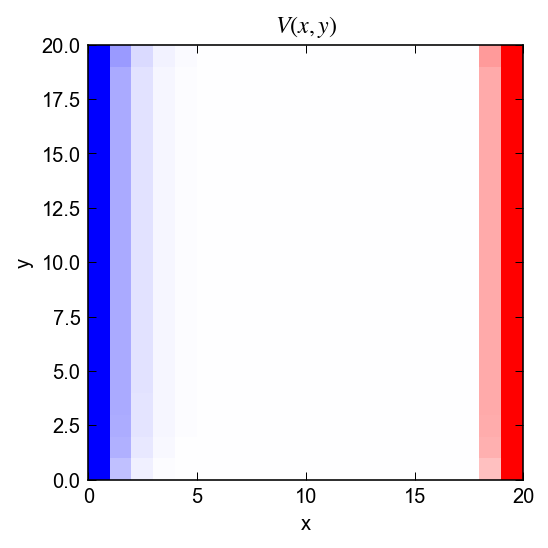

In [3]:
Nx = 20
Ny = 20
V = np.zeros((Nx,Ny))
V[0,:] = -1.0
V[-1,:] = 1.0
for i in range(1, Nx-1):
    for j in range(Ny-1):
        V[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
    V[i,-1] = 0.25*(V[i-1,-1] + V[i+1,-1] + V[i,0] + V[i,-2])

plt.figure()
ax = plt.axes(aspect='equal')
ax.pcolormesh(V.T, cmap='bwr') # pcolormesh always interprets columns as x and rows as y
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$V(x,y)$')

### Does this look like the correct solution?

What happens if we try to solve the equation again based on the results from the previous iteration?

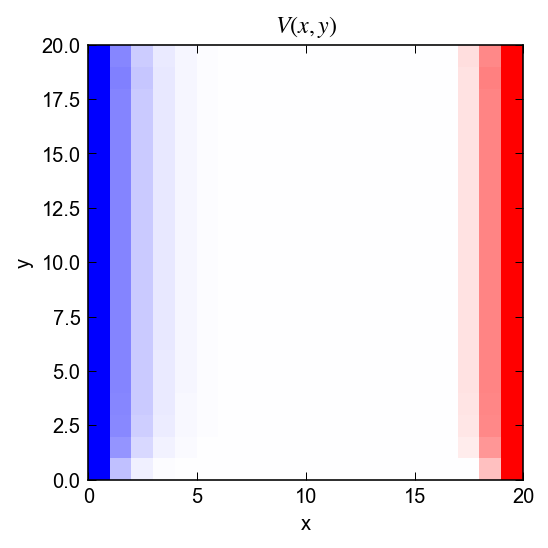

In [4]:
for i in range(1, Nx-1):
    for j in range(1, Ny-1):
        V[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
    V[i,-1] = 0.25*(V[i-1,-1] + V[i+1,-1] + V[i,0] + V[i,-2])
plt.figure()
ax = plt.axes(aspect='equal')
ax.pcolormesh(V.T, cmap='bwr') # pcolormesh always interprets columns as x and rows as y
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$V(x,y)$')

No matter how many iterations we try, the above approach provides unusual results. The analytical solution for an infinite parallel plate capacitor predicts that the potential varies linearly along the $x$ direction

\begin{equation}
    V(x,y) = \frac{(L-x)}{L}\Delta V  - V(0,y),
\end{equation}

where $\Delta V = V(0,y) - V(L,y)$ and is independent on the value of $y$.

## Why does the solution change every time we iterate over the grid?

Our finite difference equations to solve the Poisson or Laplace equations rely on being simultaneously satisfied at **all** grid points. In other words, the solution to the PDE must be self-consistent. In the code above we break the symmetry of the problem (as it is clearly seen from the graph) by using the newly updated values of the potential as we iterate over the coordinates from left to right and top to bottom.

## Relaxation Methods

We can find a solution to the Poisson/Laplace equation by iteratively updating the potential based on the values at a previous iteration

\begin{equation}
\tilde{V}(i,j,n+1) = \frac{1}{4} \left[\tilde{V}(i+1,j,n) + \tilde{V}(i-1,j,n) + \tilde{V}(i,j+1,n) + \tilde{V}(i,j-1,n) \right] + \frac{\rho(i,j)\Delta^2}{4\varepsilon_0},
\end{equation}

where the solution to the PDE is obtained in the limit of infinite number of iterations

\begin{equation}
V(i,j) = \tilde{V}(i,j,n \to \infty) \\
\\
\tilde{V}_0(i,j) \to \tilde{V}_1(i,j) \to \tilde{V}_2(i,j) \to \dots \to V(i,j).
\end{equation}

This simple iterative *relaxation* scheme is known as the Jacobi method, where one can *guess* the solution to the equation at the first iteration, $\tilde{V}_0(i,j)$, to be the value of the potential at the fixed boundaries (or the charge density) and zero otherwise.

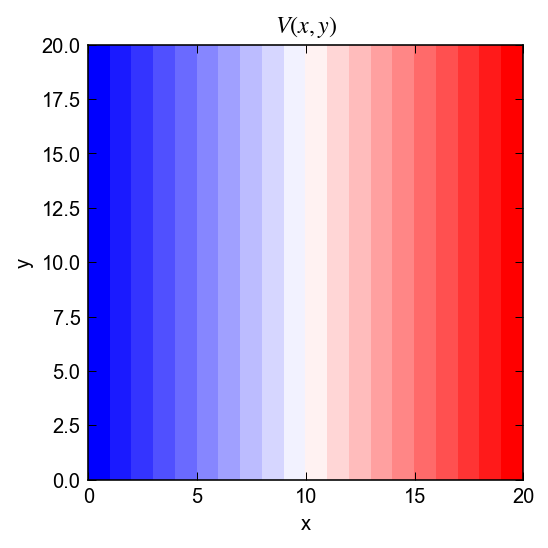

In [5]:
Nx = 20
Ny = 20
t_iter = 1000
V = np.zeros((Nx,Ny,t_iter))
V[0,:,:] = -1.0
V[-1,:,:] = 1.0
for n in range(t_iter-1):
    for i in range(1, Nx-1):
        for j in range(Ny-1):
            V[i,j,n+1] = 0.25*(V[i-1,j,n] + V[i+1,j,n] + V[i,j+1,n] + V[i,j-1,n])
        V[i,-1,n+1] = 0.25*(V[i-1,-1,n] + V[i+1,-1,n] + V[i,0,n] + V[i,-2,n])
plt.figure()
ax = plt.axes(aspect='equal')
ax.pcolormesh(V[:,:,-1].T, vmin=-1.0, vmax=1.0,cmap='bwr') # pcolormesh always interprets columns as x and rows as y
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$V(x,y)$')

<IPython.core.display.Javascript object>


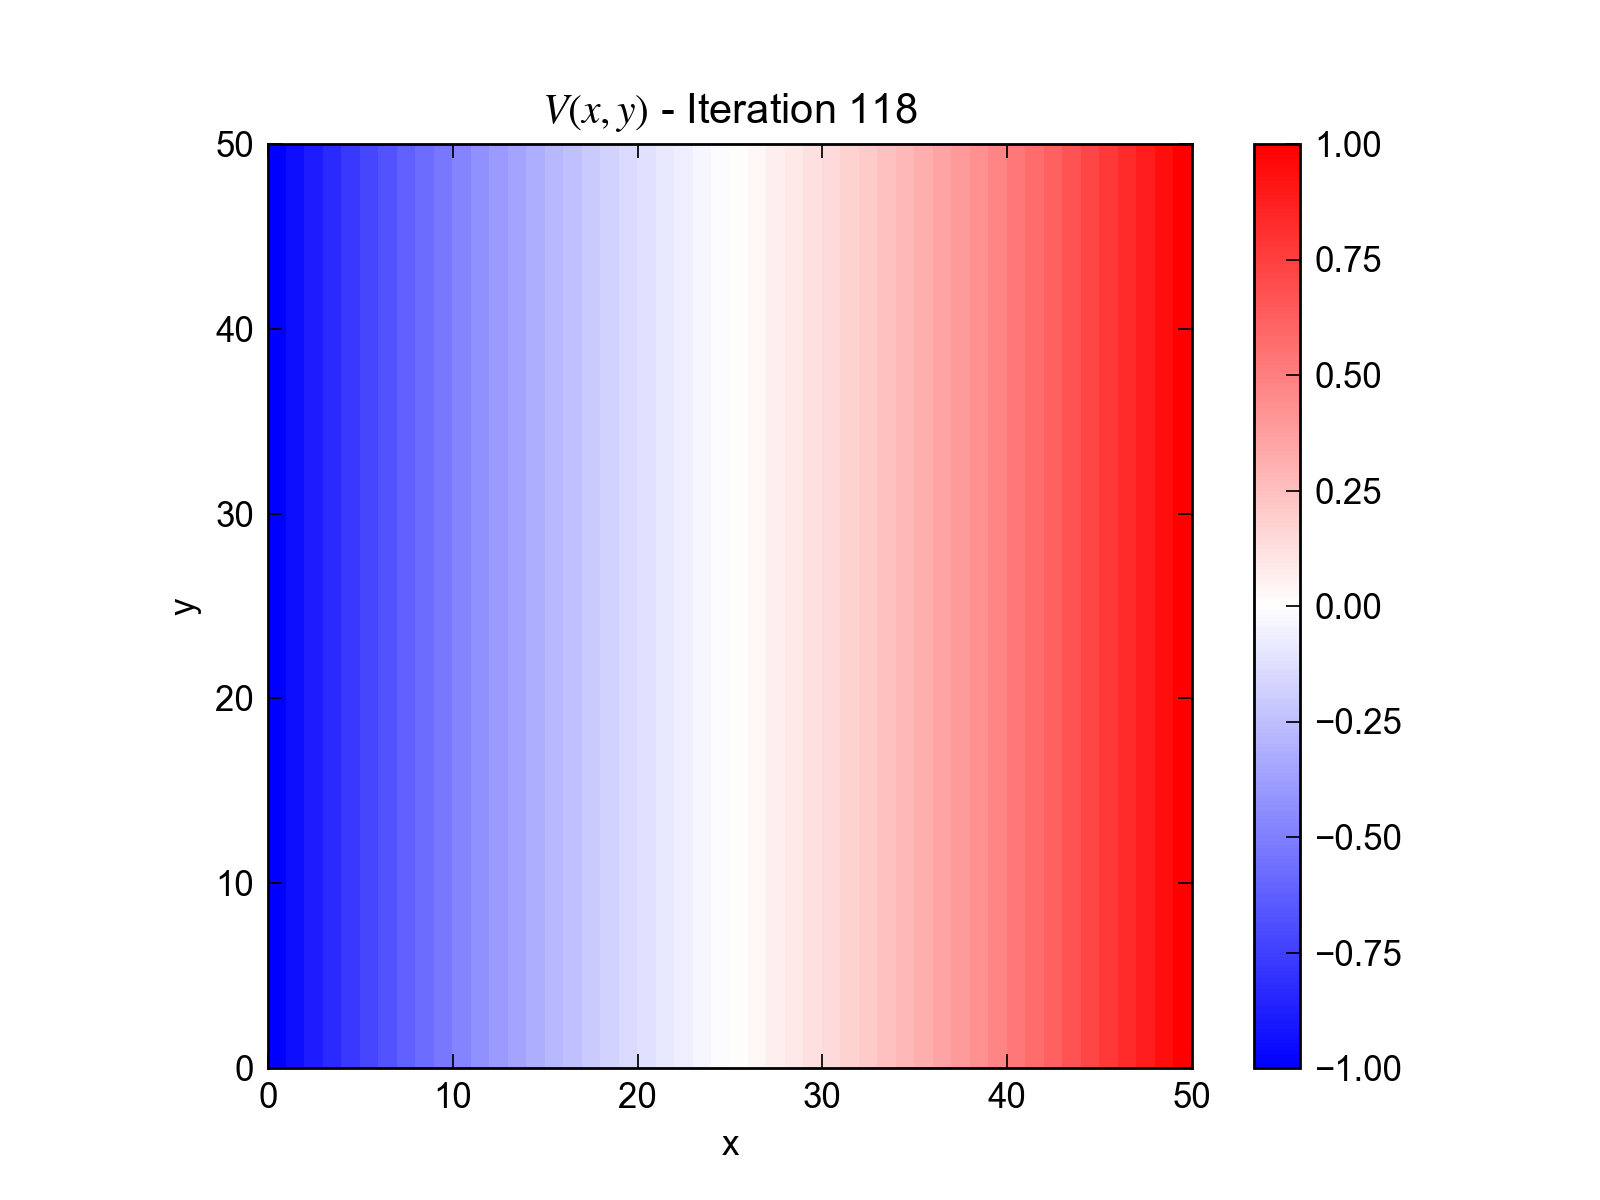

In [7]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook

Nx = 50
Ny = 50
t_iter = 1000
V = np.zeros((Nx,Ny,t_iter))
V[0,:,:] = -1.0
V[-1,:,:] = 1.0
for n in range(t_iter-1):
    for i in range(1, Nx-1):
        for j in range(Ny-1):
            V[i,j,n+1] = 0.25*(V[i-1,j,n] + V[i+1,j,n] + V[i,j+1,n] + V[i,j-1,n])
        V[i,-1,n+1] = 0.25*(V[i-1,-1,n] + V[i+1,-1,n] + V[i,0,n] + V[i,-2,n])

fig, ax = plt.subplots()
ax.set_aspect('equal')
# create a plot object that will be updated after each iteration
cax = ax.pcolormesh(V[:,:,0].T,vmin=-1, vmax=1, cmap='bwr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$V(x,y)$ - Iteration 1')
fig.colorbar(cax)

# function to update the plot data to be animated
def animate(i):
    cax.set_array(V[:,:,i].T.flatten())
    ax.set_title(r'$V(x,y)$ - Iteration ' + str(i))

anim = FuncAnimation(fig, animate, interval=50, frames=t_iter-1, repeat=False)
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


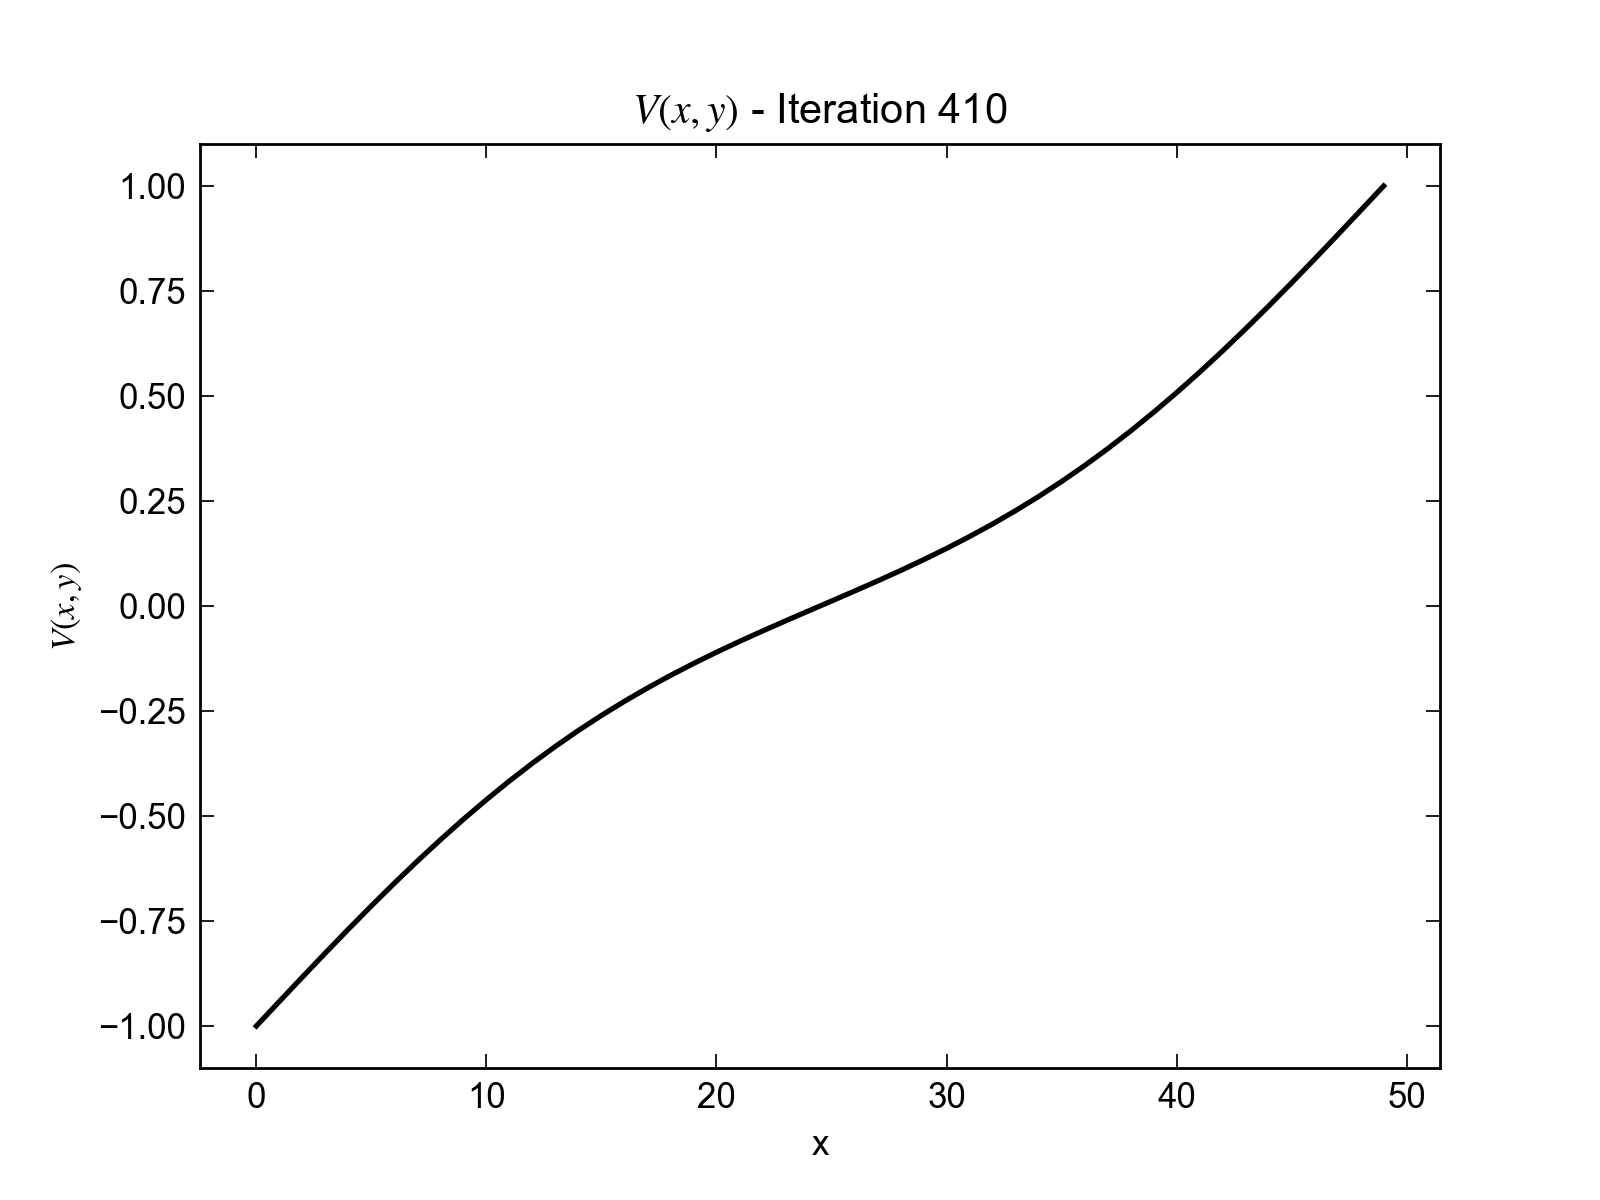

In [8]:
# set up the figure
fig, ax = plt.subplots()

# create a line object that will be animated
line = ax.plot(V[:,0,0], color='k', lw=1.5)[0]
ax.set_title('Iteration 1')
ax.set_xlabel('x')
ax.set_ylabel(r'$V(x,y)$')

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(V[:,0,i])
    ax.set_title(r'$V(x,y)$ - Iteration ' + str(i))

anim = FuncAnimation(fig, animate, interval=10, frames=t_iter-1, repeat=False)
 
plt.draw()
plt.show()

Solving Poisson's equation with the relaxation method is analogous to solving the diffusion equation in time, and our starting guess for the first iteration is simply the initial condition

\begin{equation}
\frac{\partial}{\partial t} \tilde{V}(x,y,z,t) = D \left(\frac{\partial^2}{\partial x^2} \tilde{V}(x,y,z,t) + \frac{\partial^2}{\partial y^2} \tilde{V}(x,y,z,t) + \frac{\partial^2}{\partial z^2} \tilde{V}(x,y,z,t) \right)
\end{equation}

We require that the long-time steady state solution of our time-dependent equation is the solution of our original Laplace equation.

\begin{equation}
V(x,y,z) = \tilde{V}(x,y,z,t \to \infty)
\end{equation}



### What about the electric field, $\vec{E}$ ?

Once we find a solution to the potential, it is very easy to calculate the electric field using a simple central difference

\begin{align}
    E_x(i,j) &= - \frac{V(i+1,j) - V(i-1,j)}{2 \Delta y} \newline
    E_y(i,j) &= - \frac{V(i,j+1) - V(i,j-1)}{2 \Delta x}
\end{align}


<IPython.core.display.Javascript object>


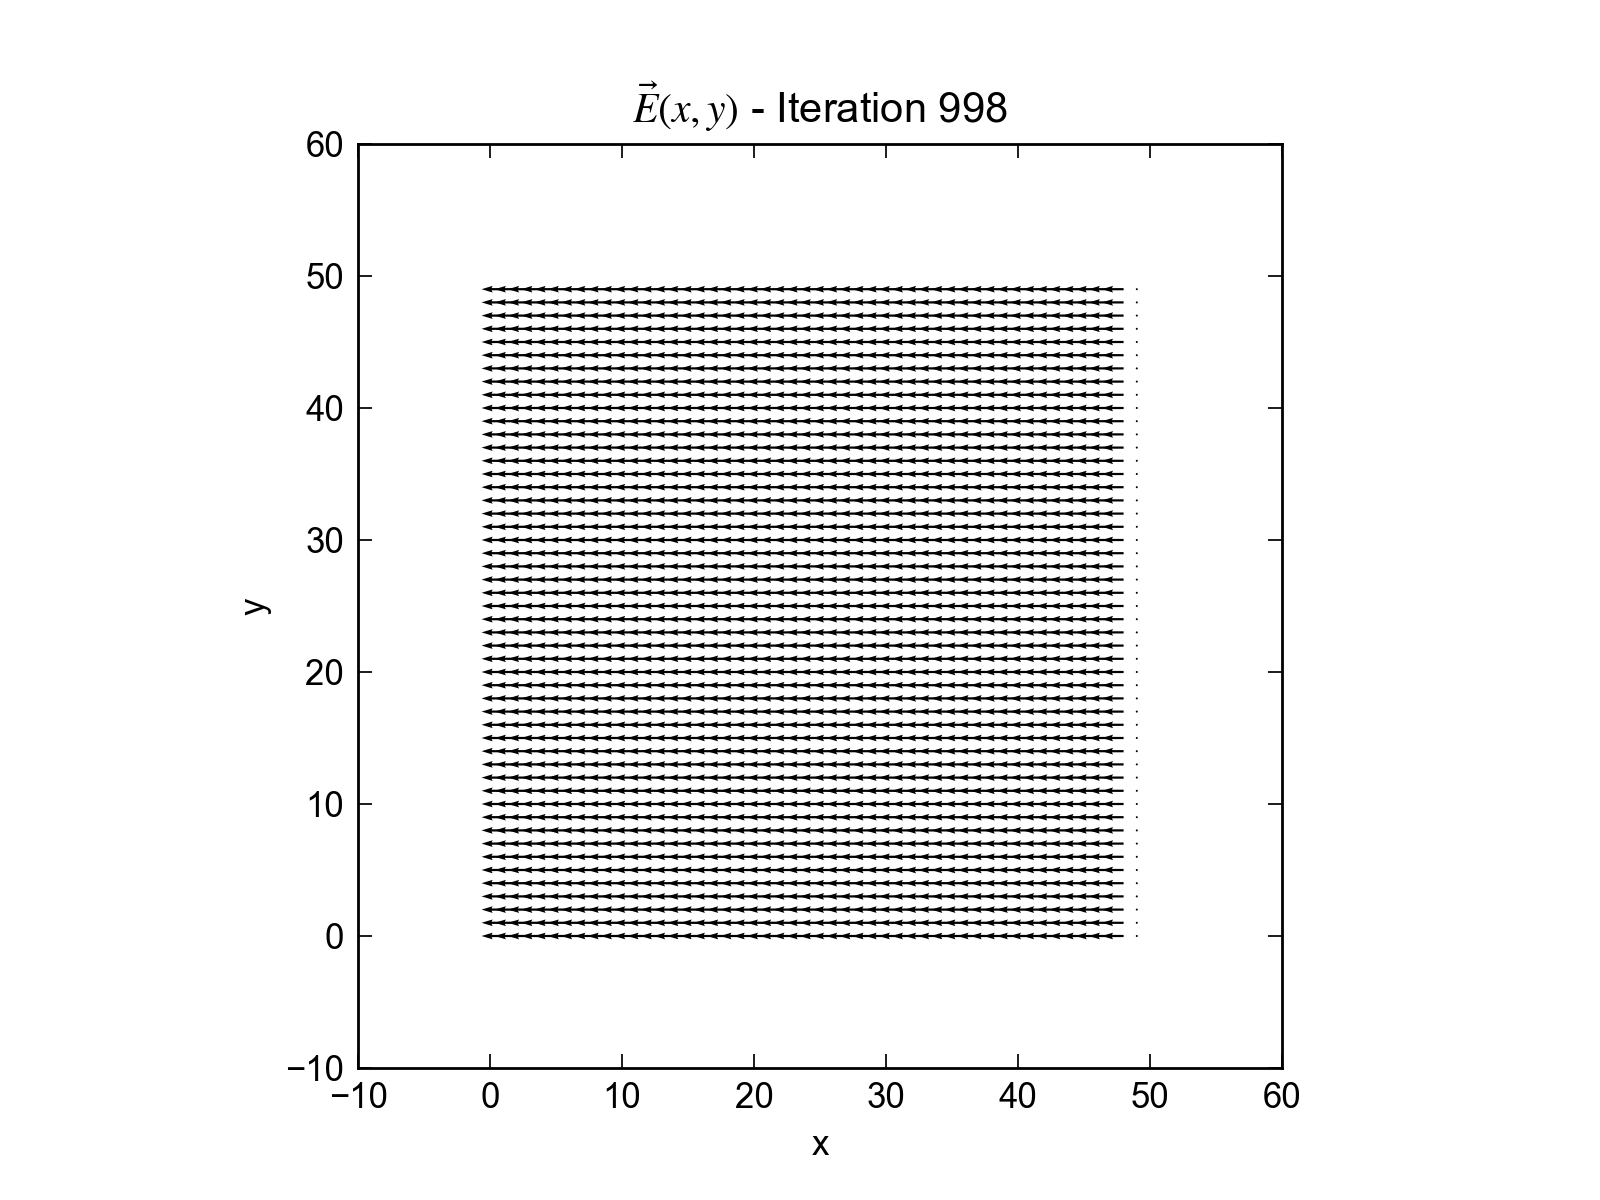

In [9]:
Nx = 50
Ny = 50
t_iter = 1000
Ex = np.zeros_like(V)
Ey = np.zeros_like(V)
dx = 1.0/Nx
dy = 1.0/Ny

for n in range(t_iter-1):
    for i in range(1,Nx-1):
        for j in range(Ny-1):
            Ex[i,j,n] = -0.5*(V[i+1,j,n]-V[i-1,j,n])/dx
            Ey[i,j,n] = -0.5*(V[i,j+1,n]-V[i,j-1,n])/dy
        Ex[i,Ny-1,n] = -0.5*(V[i+1,Ny-1,n]-V[i-1,Ny-1,n])/dx
        Ey[i,Ny-1,n] = -0.5*(V[i,0,n]-V[i,Ny-2,n])/dy

fig, ax = plt.subplots()
ax.set_aspect('equal')
# create a plot object that will be updated after each iteration
qax = plt.quiver(Ex[:,:,0].T, Ey[:,:,0].T)
ax.set_ylim(-10,60)
ax.set_xlim(-10,60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$\vec{E}(x,y)$ - Iteration 1')

# function to update the plot data to be animated
def animate(i):
    qax.set_UVC(Ex[:,:,i].T, Ey[:,:,i].T)
    ax.set_title(r'$\vec{E}(x,y)$ - Iteration ' + str(i))

anim = FuncAnimation(fig, animate, interval=10, frames=t_iter-1, repeat=False)
plt.draw()
plt.show()

The electric field inside an infinite parallel plate capacitor is constant

\begin{equation}
    E = \frac{\Delta V}{L}.
\end{equation}